In [1]:
import numpy as np
import matplotlib.pylab as pl
from matplotlib.lines import Line2D
import torch
import ot.plot
from IPython import display
import time

In [2]:
import sys
sys.path.append('../code/')
from generate_data import make_data
from linear_solver import UOT_W
from sinkhorn_iterates import sinkhorn
from sinkhorn_iterates_logdomain import logsinkhorn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device='cpu'
dtype = torch.DoubleTensor
print('Used device: '+device)

Used device: cpu


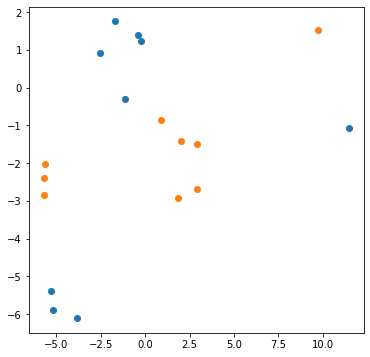

In [4]:
np.random.seed(1)
X=np.vstack((np.random.randn(5,2)+np.array([-2,2]),np.random.randn(1,2)+np.array([10,1]),np.random.randn(3,2)+np.array([-5,-5])))
Y=np.vstack((np.random.randn(5,2)+np.array([2,-2]),np.random.randn(1,2)+np.array([10,1]),np.random.randn(3,2)+np.array([-5,-2])))
#X,Y=make_data("iso_gaussians",8,2)

n,d=X.shape

pl.figure(figsize=(6,6))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target')

In [5]:
C=ot.dist(X,Y)
Cx=ot.dist(X,X)
Cy=ot.dist(Y,Y)
a,b=torch.ones((n,)),torch.ones((n,))

In [6]:
P,Qx,Qy=UOT_W(a,b,C,lam=1,Cx=Cx,Cy=Cy,innerplan=True,solver="ECOS")

a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

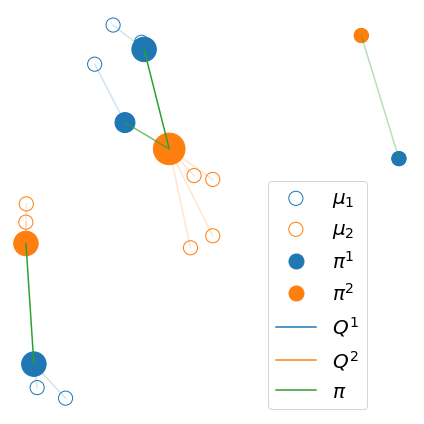

In [7]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P, c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx, c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy, c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
pl.savefig("../Figures/cluster_W.pdf",bbox_inches='tight')

In [25]:
lam=[.1,2,10]
P_l=[]
Qx_l=[]
Qy_l=[]
a_w_l=[]
b_w_l=[]
for l in lam:
    P,Qx,Qy=UOT_W(a,b,C,lam=l,Cx=Cx,Cy=Cy,innerplan=True,solver="ECOS")
    P_l+=[P]
    Qx_l+=[Qx]
    Qy_l+=[Qy]
    a_w_l+=[P@np.ones(n)]
    b_w_l+=[(P.T)@np.ones(n)]

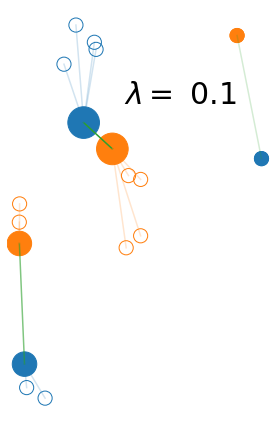

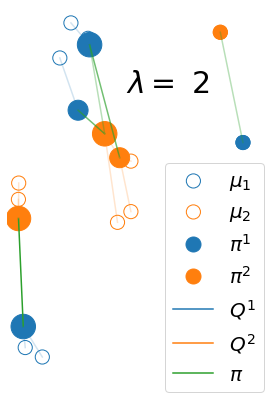

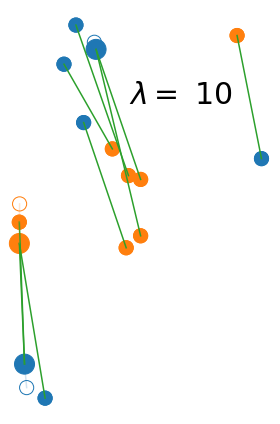

In [35]:
s=200
for i,l in enumerate(lam):    
    pl.figure(figsize=(4,6))
    ot.plot.plot2D_samples_mat(X, Y, P_l[i], c='C2')
    ot.plot.plot2D_samples_mat(X, X, Qx_l[i], c='C0',alpha=0.2)
    ot.plot.plot2D_samples_mat(Y, Y, Qy_l[i], c='C1',alpha=0.2)
    pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_w_l[i]*s)
    pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_w_l[i]*s)

    pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
    pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
    if i==1:
        label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
        label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
        label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
        label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
        label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
        handles, labels = pl.gca().get_legend_handles_labels()
        handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
        pl.legend(handles=handles,bbox_to_anchor=(.6,.6), prop={'size': 20})
    pl.axis('off')
    pl.tight_layout()
    if i==0:
        pl.title("$\lambda =$ %1.1f"%l,size=30,x=.65,y=.75)
    else:
        pl.title("$\lambda =$ %i"%l,size=30,x=.65,y=.75)
    pl.savefig("../Figures/cluster_W"+str(i)+".pdf",bbox_inches='tight')

In [77]:
u,v,G,Qx,Qy=logsinkhorn(a.float(),b.float(),torch.tensor(C).float(),lam=1,eps=.5,numiter=500,pen="sinkhorn",
               Cx=torch.tensor(Cx).float(),Cy=torch.tensor(Cy).float(),numiter2=10,innerplan=True,eps2=.1)
P=u.reshape((-1, 1)) * G * v.reshape((1, -1))
a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

print(torch.sum(P))
print(torch.sum(P*C))

tensor(9.0000)
tensor(53.9314, dtype=torch.float64)


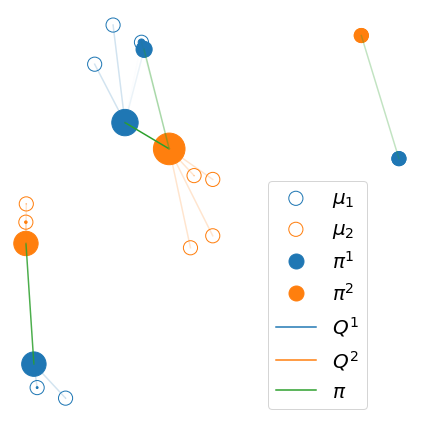

In [78]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P.numpy(), c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx.numpy(), c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy.numpy(), c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
pl.savefig("../Figures/cluster_S1.pdf",bbox_inches='tight')

In [79]:
u,v,G,Qx,Qy=logsinkhorn(a.float(),b.float(),torch.tensor(C).float(),lam=1,eps=.5,numiter=500,pen="sinkhorn",
               Cx=torch.tensor(Cx).float(),Cy=torch.tensor(Cy).float(),numiter2=10,innerplan=True,eps2=1)
P=u.reshape((-1, 1)) * G * v.reshape((1, -1))
a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

print(torch.sum(P))
print(torch.sum(P*C))

tensor(9.0000)
tensor(54.5631, dtype=torch.float64)


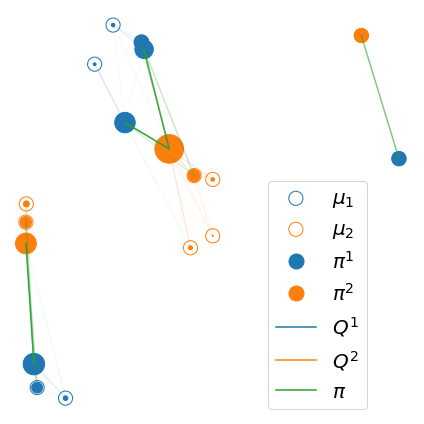

In [65]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P.numpy(), c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx.numpy(), c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy.numpy(), c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
pl.savefig("../Figures/cluster_S2.pdf",bbox_inches='tight')

In [80]:
u,v,G,Qx,Qy=logsinkhorn(a.float(),b.float(),torch.tensor(C).float(),lam=1,eps=.5,numiter=500,pen="sinkhorn",
               Cx=torch.tensor(Cx).float(),Cy=torch.tensor(Cy).float(),numiter2=10,innerplan=True,eps2=10)
P=u.reshape((-1, 1)) * G * v.reshape((1, -1))
a_W=P@np.ones(n)
b_W=(P.T)@np.ones(n)

print(torch.sum(P))
print(torch.sum(P*C))

tensor(9.0000)
tensor(70.8992, dtype=torch.float64)


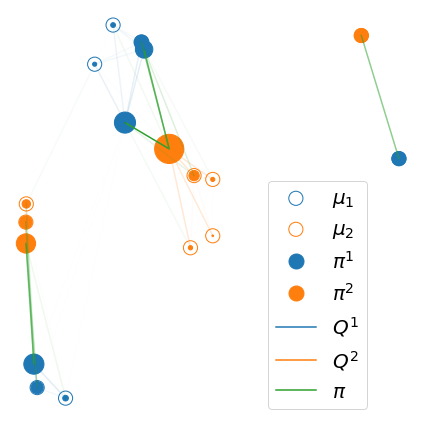

In [81]:
s=200
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X, Y, P.numpy(), c='C2')
ot.plot.plot2D_samples_mat(X, X, Qx.numpy(), c='C0',alpha=0.2)
ot.plot.plot2D_samples_mat(Y, Y, Qy.numpy(), c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], c='C0',s=a_W*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1',s=b_W*s)
#pl.scatter(X[:, 0], X[:, 1], c='C0',alpha=0.2)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1',alpha=0.2)
pl.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='C0',label="$\mu_1$",s=s)
pl.scatter(Y[:, 0], Y[:, 1], facecolors='none', edgecolors='C1',label="$\mu_2$",s=s)
label1 = Line2D([0], [0], label="$\pi^1$", marker='o', color='C0', linestyle='',markersize=15)
label2 = Line2D([0], [0], label="$\pi^2$", marker='o', color='C1', linestyle='',markersize=15)
label3 = Line2D([0], [0], label="$Q^1$", color='C0', linestyle='solid',alpha=1)
label4 = Line2D([0], [0], label="$Q^2$", color='C1', linestyle='solid',alpha=1)
label5 = Line2D([0], [0], label="$\pi$", color='C2', linestyle='solid')
#label6 = Line2D([0], [0], label="$\mu_1$", marker='o', color='C0', linestyle='',alpha=0.2)
#label7 = Line2D([0], [0], label="$\mu_2$", marker='o', color='C1', linestyle='',alpha=0.2)
handles, labels = pl.gca().get_legend_handles_labels()
handles.extend([label1,label2,label3,label4,label5])#,label6,label7])
pl.axis('off')
pl.tight_layout()
pl.legend(handles=handles,bbox_to_anchor=(.9,.6), prop={'size': 20})
pl.savefig("../Figures/cluster_S3.pdf",bbox_inches='tight')